# Generalized Linear Models in Python (Python)

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Generalized Linear Models in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# CHAPTER 1 - Introduction to GLMs
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

# CHAPTER 2 - Modeling Binary Data
import statsmodels.api as sm
from statsmodels.formula.api import glm

# CHAPTER 3 - Modeling Count Data
import math

# CHAPTER 4 - Multivariable Logistic Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Introduction to GLMs

Review linear models and learn how GLMs are an extension of the linear model given different types of response variables. You will also learn the building blocks of GLMs and the technical process of fitting a GLM in Python.

#### Exercício 1 - Going beyond linear regression

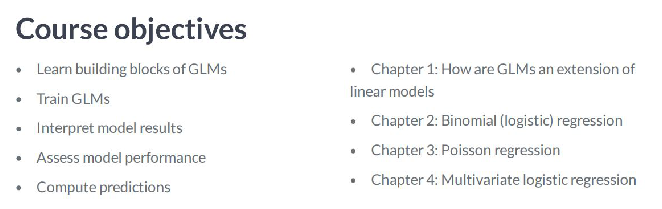

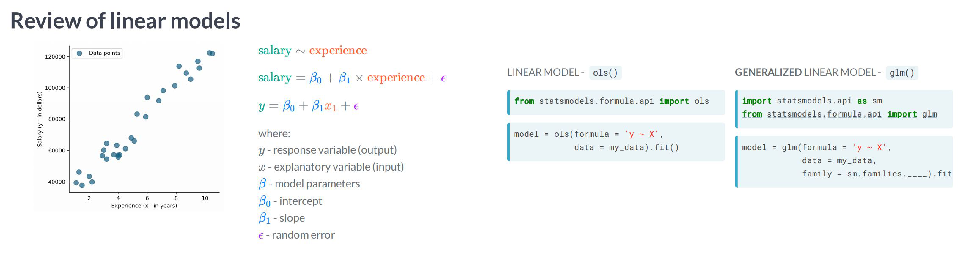

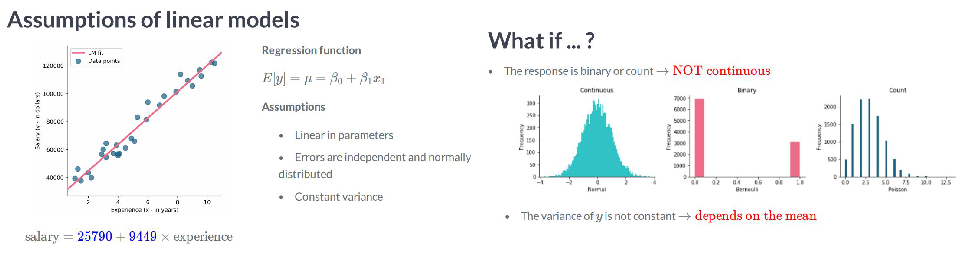

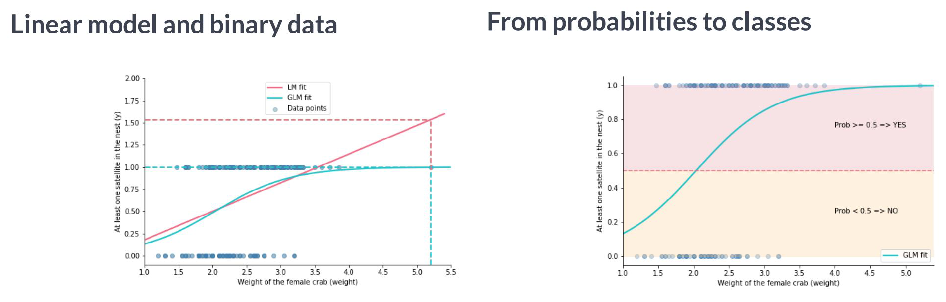

In [5]:
#vídeo

plot_1('course', right=1.5)
print('='*120)
plot_2('linear_review', 'sklearn_lin_genlin', wspace=0.1)
plot_2('assumptions_linear', 'not_continuous')
print('='*120)

# Dataset- nesting of horseshoe crabs
plot_2('linear_binary', 'prob')

Exercício 2

In [6]:
# Applying linear models

# In the lesson, you reviewed linear models and how they can "break" when certain assumptions are not met. For example, one
# assumption is that the response variable is continuous and that a Gaussian distribution for the response can be applied 
# for the model formulation. In case of a binary response variable, the response distribution is Binomial providing for the
# estimated y to be bounded by 0 and 1.

# Using the information provided in the lesson, which of the following statements is TRUE?

print("The estimated probabilities from the Binomial GLM is between 0 and 1.")

The estimated probabilities from the Binomial GLM is between 0 and 1.


Exercício 3

In [7]:
# Linear model, a special case of GLM

salary = pd.read_csv(data_folder + "salary.csv")

import statsmodels.api as sm
from statsmodels.formula.api import ols, glm

# Fit a linear model
model_lm = ols(formula = 'Salary ~ Experience', data = salary).fit()

# View model coefficients
print("ols:\n", model_lm.params, "\n")


# Fit a GLM
model_glm = glm(formula = 'Salary ~ Experience', data = salary, family = sm.families.Gaussian()).fit()

# View model coefficients
print("glm:\n", model_glm.params)


ols:
 Intercept     25792.200199
Experience     9449.962321
dtype: float64 

glm:
 Intercept     25792.200199
Experience     9449.962321
dtype: float64


#### Exercício 4 - How to build a GLM

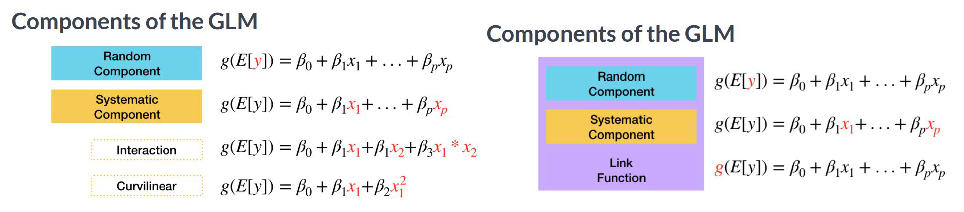

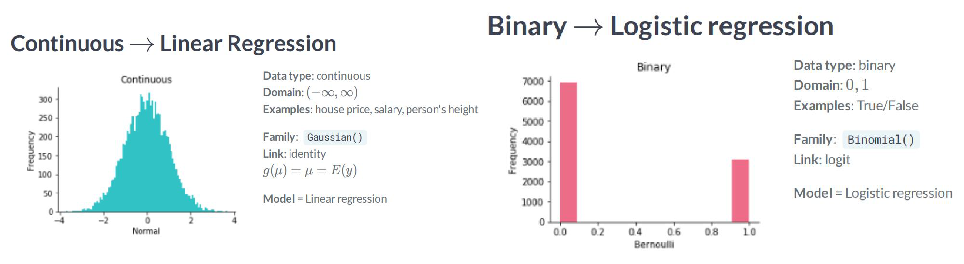

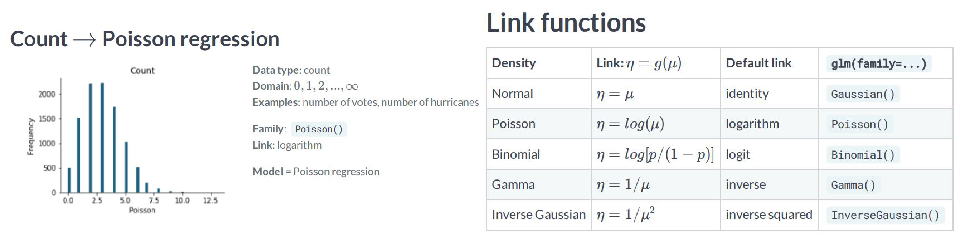

Benefits of GLMs:
 - A unied framework for many different data distributions
    - Exponential family of distributions
 - Link function
    - Transforms the expected value of y (and not the y itself)
    - Enables linear combinations.
    - Many techniques from linear models apply to GLMs as well.


In [8]:
#vídeo

plot_2('glm_components', 'glm_components_2')
plot_2('linear_regression', 'logistic_regression')
plot_2('poisson_regression', 'link_functions')

print("""Benefits of GLMs:
 - A unied framework for many different data distributions
    - Exponential family of distributions
 - Link function
    - Transforms the expected value of y (and not the y itself)
    - Enables linear combinations.
    - Many techniques from linear models apply to GLMs as well.""")

Exercício 5

Consider a study in which you are trying to predict the number of bike crossings over the Brooklyn bridge in New 
York City given daily temperature.


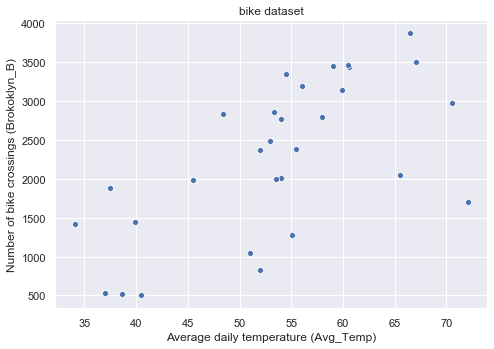

   Avg_Temp  Brooklyn_B  Total_Crossings
0     72.05      1704.0            11497
1     51.95       827.0             6922
2     36.95       526.0             4759
3     38.60       521.0             4335
4     34.10      1416.0             9471

You decide to fit a GLM model. Considering the response, the number of bike crossings, which distribution family
would you consider for fitting a GLM model?
Poisson()


In [9]:
# Data type and distribution family

# In this lesson you learned different data types which can be modeled using the generalized linear models (GLMs). 
# In this exercise you will review the data types and apply the correct distribution family to fit a GLM.

bike = pd.read_csv(data_folder + "bike.csv")

print("""Consider a study in which you are trying to predict the number of bike crossings over the Brooklyn bridge in New 
York City given daily temperature.""")

sns.scatterplot(x='Avg_Temp', y='Brooklyn_B', data=bike)
plt.xlabel('Average daily temperature (Avg_Temp)')
plt.ylabel("Number of bike crossings (Brokoklyn_B)")
plt.title("bike dataset")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print(bike.head())

print("""\nYou decide to fit a GLM model. Considering the response, the number of bike crossings, which distribution family
would you consider for fitting a GLM model?
Poisson()""")

Suppose you are working on a study helping banks approve loans and you are assigned to develop a model which 
would predict the probability of a default of a customer, i.e. if the bank grants a loan to a customer what is the
probability that customer will not repay the loan. You want to predict the probability of default using Age of the 
customer.


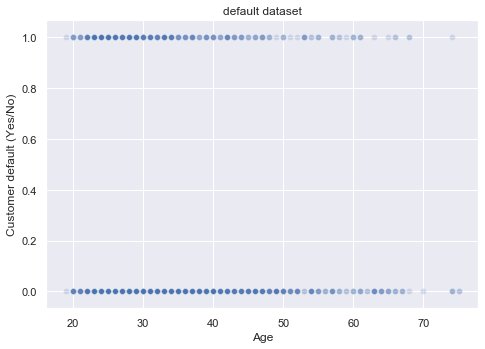

   Default  Duration  Credit_Amount  Age
0        0         6           1169   67
1        1        48           5951   22
2        0        12           2096   49
3        0        42           7882   45
4        1        24           4870   53

Considering the response, the event of a default, which distribution family you would consider for fitting a GLM
model? 
Binomial()


In [10]:
print("""Suppose you are working on a study helping banks approve loans and you are assigned to develop a model which 
would predict the probability of a default of a customer, i.e. if the bank grants a loan to a customer what is the
probability that customer will not repay the loan. You want to predict the probability of default using Age of the 
customer.""")

default = pd.read_csv(data_folder + "default.csv")

sns.scatterplot(x='Age', y='Default', data=default, alpha=0.2)
plt.xlabel('Age')
plt.ylabel("Customer default (Yes/No)")
plt.title("default dataset")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print(default.head())

print("""\nConsidering the response, the event of a default, which distribution family you would consider for fitting a GLM
model? 
Binomial()""")

For the final example, suppose you are working on a study and would like to would like to predict insurance costs 
given the BMI (body mass index) of the individual. (??)


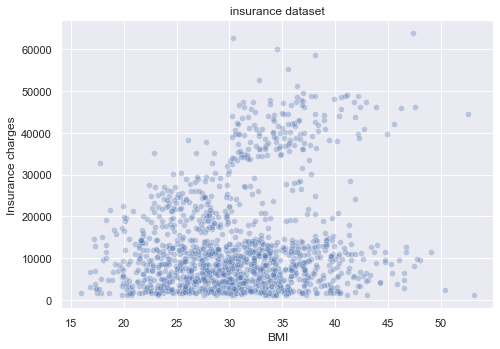

   age     bmi      charges
0   19  27.900  16884.92400
1   18  33.770   1725.55230
2   28  33.000   4449.46200
3   33  22.705  21984.47061
4   32  28.880   3866.85520

Considering the response, the insurance charge, which distribution family you would consider for fitting a GLM 
model?
Gaussian()


In [11]:
print("""For the final example, suppose you are working on a study and would like to would like to predict insurance costs 
given the BMI (body mass index) of the individual. (??)""")

insurance = pd.read_csv(data_folder + "insurance.csv")

sns.scatterplot(x='bmi', y='charges', data=insurance, alpha=0.32)
plt.xlabel('BMI')
plt.ylabel("Insurance charges")
plt.title("insurance dataset")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print(insurance.head())

print("""\nConsidering the response, the insurance charge, which distribution family you would consider for fitting a GLM 
model?
Gaussian()""")

Exercício 6

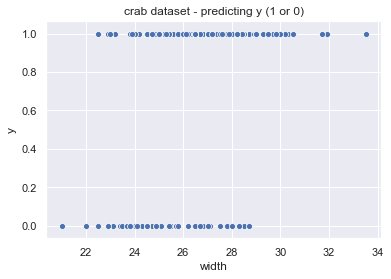

Linear regression model: 
                  Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.19515
Method:                          IRLS   Log-Likelihood:                -103.13
Date:                Thu, 23 Jan 2020   Deviance:                       33.371
Time:                        18:01:24   Pearson chi2:                     33.4
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7655    

crab  sat  y  weight  width  color  spine         width_C
0     1    8  1    3.05   28.3      2      3  [28.25, 29.25)
1     2    0  0    1.55   22.5      3      3    [0.0, 23.25)
2     3    9  1    2.30   26.0      1      1  [25.25, 26.25)
3     4    0  0    2.10   24.8      3      3  [24.25, 25.25)
4     5    4  1    2.60   26.0      3      3  [25.25, 26.25)

In [12]:
# Linear model and a binary response variable

# In the video, you saw an example of fitting a linear model to a binary response variable and how things can go wrong 
# quickly. You learned that, given the linear line fit, you can obtain fitted values y^, which are not in line with the 
# logic of the problem since the response variable takes on values 0 and 1.
# Using the preloaded crab dataset, you will study this effect by modeling y as a function of x using the GLM framework.

# Recall that a GLM with:
#  - the Gaussian family is a linear model (a special case of GLMs)
#  - the Binomial family is a logistic regression model.

crab = pd.read_csv(data_folder + "crab.csv")
plt.xlabel('width')
plt.ylabel('y')
plt.title('crab dataset - predicting y (1 or 0)')
sns.scatterplot(x='width', y='y', data=crab)

plt.show()

# Using the crab dataset, define the model formula so that y is predicted by width.
formula = 'y ~ width'

# Define probability distribution for the response variable for the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

# Define and fit a linear regression model
model_LM = glm(formula = formula, data = crab, family = family_LM).fit()
print("Linear regression model: \n", model_LM.summary(), "\n\n")

# Define and fit a logistic regression model
model_GLM = glm(formula = formula, data = crab, family = family_GLM).fit()
print("Logistic regression model: \n", model_GLM.summary())

print("""\nIn GLMs you have to pay special attention to the family argument which specifies the probability distribution of
the response. In the next exercise you will see how to compute the effect on the estimated probability.""")

crab.head()

Exercício 7

In [13]:
# Comparing predicted values

# In the previous exercise, you have fitted both a linear and a GLM (logistic) regression model using crab data, predicting
# ywith width. In other words, you wanted to predict the probability that the female has a satellite crab nearby given her
# width.

# The usual practice is to test the model on new, unseen, data. Test sample:
test = crab[['width', 'y']].sample(n=5)

# View test set
print(test, "\n")

# Compute estimated probabilities for linear model: pred_lm
pred_lm = model_LM.predict(test)

# Compute estimated probabilities for GLM model: pred_glm
pred_glm = model_GLM.predict(test)

# Create dataframe of predictions for linear and GLM model: predictions
predictions = pd.DataFrame({'Pred_LM': pred_lm, 'Pred_GLM': pred_glm})

# Concatenate test sample and predictions and view the results
all_data = pd.concat([test, predictions], axis = 1)

print(all_data)

print("""\nComparing the predicted values for both models, the GLM model provides values within the (0,1) range as is 
required by the binary response variable (while the LM model not always). 
How to arrive at the specific class, 0 or 1, we will cover in the next chapter.""")

     width  y
21    25.0  1
171   27.0  0
135   24.9  0
45    28.9  1
110   27.8  1 

     width  y   Pred_LM  Pred_GLM
21    25.0  1  0.522734  0.519976
171   27.0  0  0.705796  0.745434
135   24.9  0  0.513581  0.507555
45    28.9  1  0.879704  0.882793
110   27.8  1  0.779020  0.813390

Comparing the predicted values for both models, the GLM model provides values within the (0,1) range as is 
required by the binary response variable (while the LM model not always). 
How to arrive at the specific class, 0 or 1, we will cover in the next chapter.


#### Exercício 8 - How to fit a GLM in Python

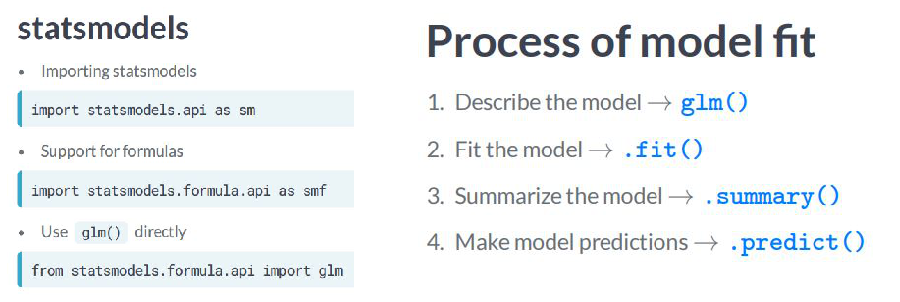

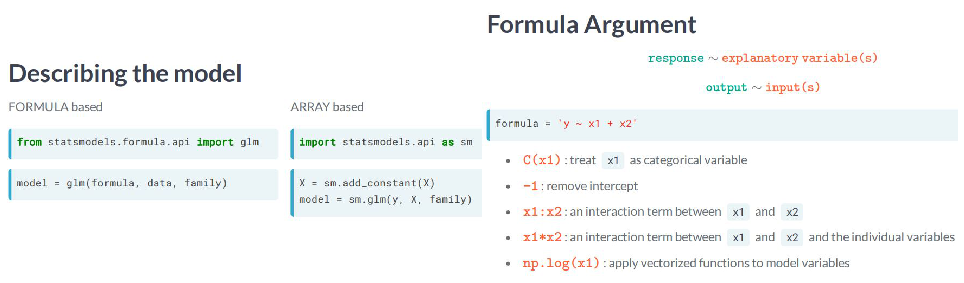

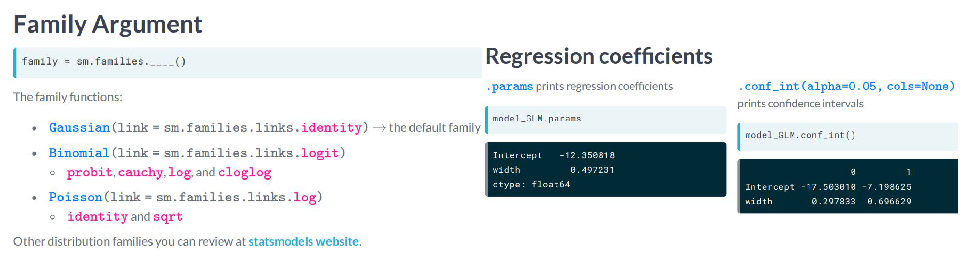

In [14]:
#vídeo

plot_2('statsmodels', 'model_fit')
plot_2('describing_model', 'argument')
plot_2('family', 'regression_coeff')

Other distribution families you can review at statsmodels website: https://www.statsmodels.org/stable/glm.html#families

Exercício 9

In [15]:
# Model fitting step-by-step

# Contamination of groundwater with arsenic in Bangladesh where we want to model the household decision on switching the 
# current well.

# The columns in the dataset are:
#  - switch: 1 if the change of the current well occurred; 0 otherwise
#  - arsenic: The level of arsenic contamination in the well
#  - distance: Distance to the closest known safe well
#  - education: Years of education of the head of the household
wells = pd.read_csv(data_folder + "wells.csv")
wells.head()

switch  arsenic   distance  assoc  education  distance100  education4
0       1     2.36  16.826000      0          0      0.16826           0
1       1     0.71  47.321999      0          0      0.47322           0
2       0     2.07  20.966999      0         10      0.20967           2
3       1     1.15  21.486000      0         12      0.21486           2
4       1     1.10  40.874001      1         14      0.40874           3

In [16]:
# Define the formula the the logistic model
model_formula = 'switch ~ distance100'

# Define the correct probability distribution and the link function of the response variable
link_function = sm.families.links.logit   # this is the default link of the Binomial by the way
model_family = sm.families.Binomial(link=link_function)

# Fit the model
wells_fit = glm(formula = model_formula, data = wells, family = model_family).fit()


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


Exercício 10

In [17]:
# Results of the model fit using summary()

# View the results of the wells_fit model
print(wells_fit.summary())

# There is plenty of information provided, but don't worry you will learn about it in the coming chapters.


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.6
Date:                Thu, 23 Jan 2020   Deviance:                       4061.3
Time:                        18:01:26   Pearson chi2:                 3.01e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6108      0.060     10.104      

Exercício 11

In [18]:
# Extracting parameter estimates

# Coefficient estimates are generally of main interest in a regression model. In the previous exercise you learned how to 
# view the results of the model fit and hence the coefficient values along with their corresponding statistics. 
# In this exercise you will learn how to extract the coefficients from the model object.

# The attribute .params contains the coefficients of the fitted model, starting with the intercept value. To compute a 95%
# confidence interval for the coefficients you can use the method .conf_int() of the fitted model wells_fit.


# Extract coefficients from the fitted model wells_fit
intercept, slope = wells_fit.params

# Print coefficients
print('Intercept = {}'.format(intercept))
print('Slope = {}\n'.format(slope))

# Extract and print confidence intervals
print("Confidence intervals: \n", wells_fit.conf_int())


Intercept = 0.6108118803818949
Slope = -0.6290808479557677

Confidence intervals: 
                     0         1
Intercept    0.492327  0.729297
distance100 -0.820345 -0.437816


# CHAPTER 2 - Modeling Binary Data

This chapter focuses on *logistic regression*. You'll learn about the structure of binary data, the logit link function, model fitting, as well as how to interpret model coefficients, model inference, and how to assess model performance.

#### Exercício 1 - Binary data and logistic regression

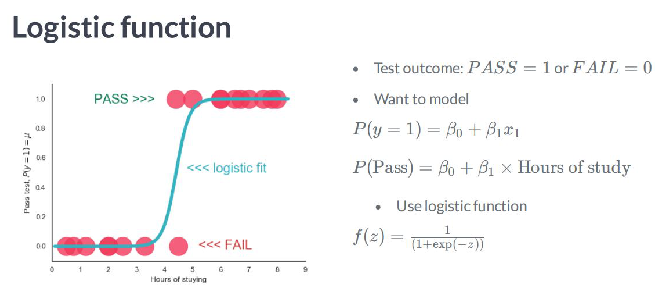

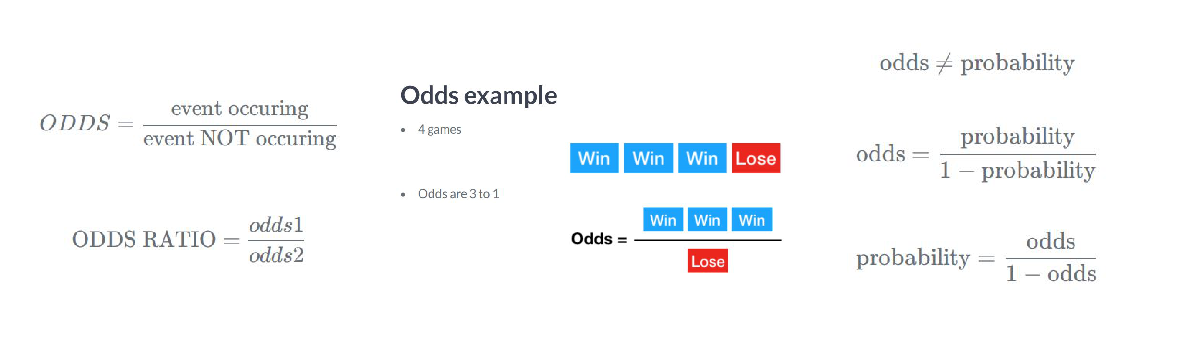

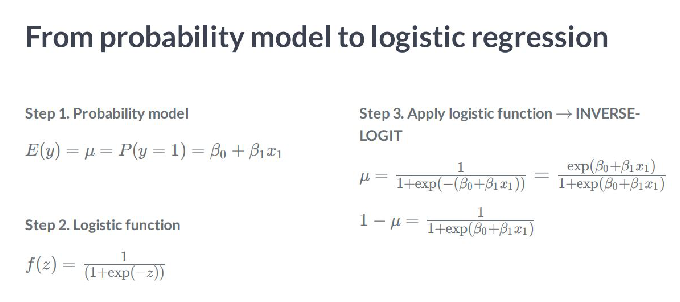

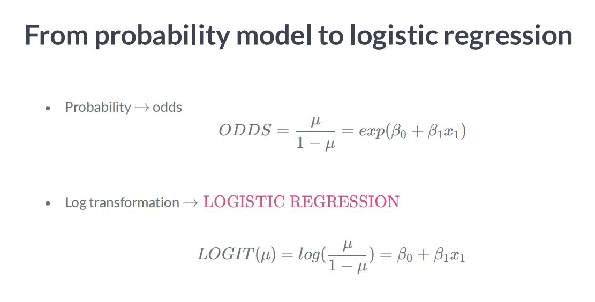

In [19]:
#vídeo

plot_1('logistic_function', right=1.5), plot_3('odds', 'odds_ex', 'odds_prob'), print('='*120)
plot_1('from_prob_logistic', right=1.7), print('='*120)
plot_1('from_prob_logistic_2', right=1.7)

Exercício 2

In [20]:
# Compute odds and probabilities

print("An athlete competes in 60 races and wins 15 times.")

# Compute the odds
odds = 15/(60-15)
print('Odds are: ', round(odds,3))

# Compute the probability
probability = 15/60
print('Probability is: ', round(probability,3))

# Compute odds using probability calculation
odds_from_probs = probability/(1 - probability)

# Print the results
print('\nOdds are: ', round(odds_from_probs,3))

An athlete competes in 60 races and wins 15 times.
Odds are:  0.333
Probability is:  0.25

Odds are:  0.333


Exercício 3

In [21]:
# Fit logistic regression

# Load libraries and functions
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit logistic regression model
model_GLM = glm(formula = 'switch ~ arsenic', data = wells, family = sm.families.Binomial()).fit() 

# Print model summary
print(model_GLM.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1997.3
Date:                Thu, 23 Jan 2020   Deviance:                       3994.6
Time:                        18:01:28   Pearson chi2:                 3.03e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3058      0.070     -4.340      0.0

#### Exercício 4 - Interpreting coefficients

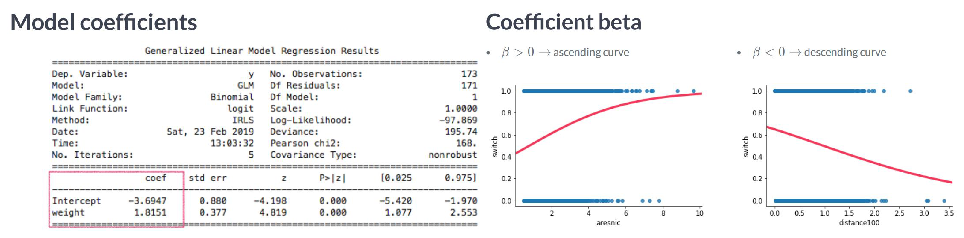

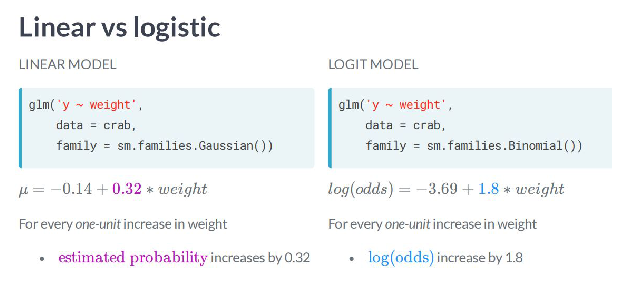

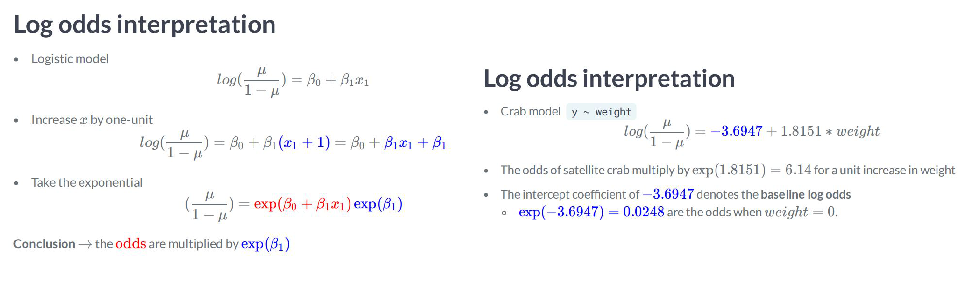

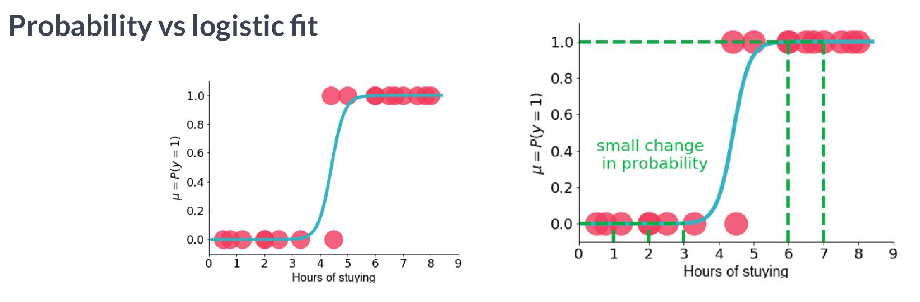

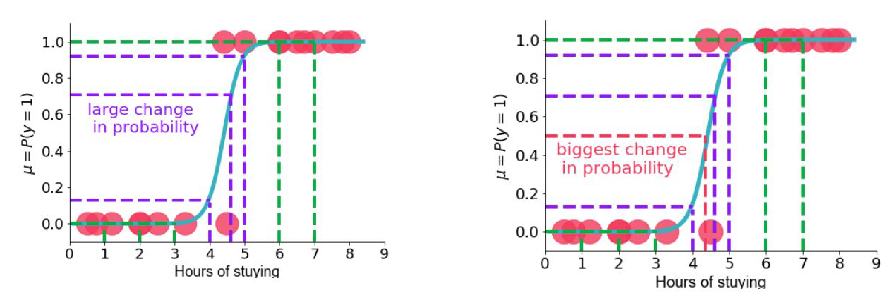

slope --> β × μ(1 − μ)


In [22]:
#vídeo

plot_2('model_coefficients', 'beta_logistic'), print('='*120)
plot_1('linear_logistic', right=2), plot_2('log_odds_interpretation', 'log_odds_interpretation_2'), print('='*120)
plot_2('log_fit', 'log_fit_2'), plot_2('log_fit_3', 'log_fit_4')
print("slope --> β × μ(1 − μ)")

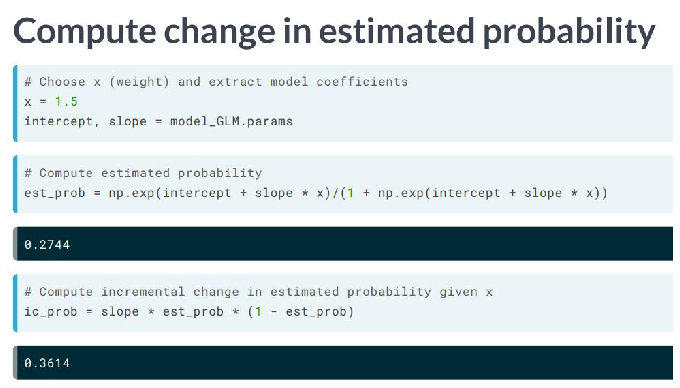

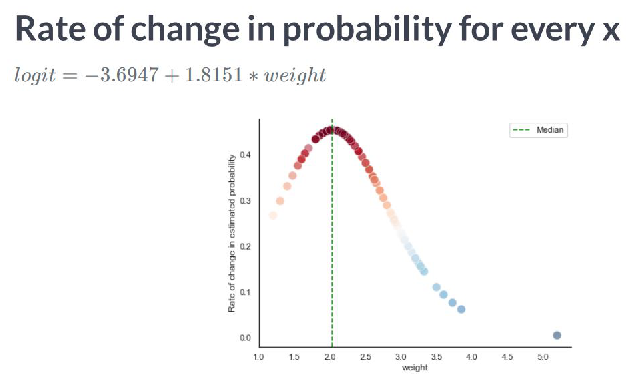

In [23]:
plot_1('compute_change_prob', right=2, bottom=-0.3)
plot_1('rate_change_prob_x', right=2, bottom=-0.3)

Exercício 5

In [24]:
# Coefficients in terms of odds

# Load libraries and functions
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit logistic regression model
model_GLM = glm(formula = 'switch ~ distance100', data = wells, family = sm.families.Binomial()).fit() 

# Extract model coefficients
print('Model coefficients: \n', model_GLM.params, "\n")

# Compute the multiplicative effect on the odds
print('Odds: \n', np.exp(model_GLM.params))

print("""\nThe ODDS of switching the well is {} for a 1-unit (100m) increase in distance, so for every one switch
(household switches to the nearest safe well) there would be 2 households who would not switch to the nearest safe well.
""".format(round(np.exp(model_GLM.params)['distance100'], 2)))

Model coefficients: 
 Intercept      0.610812
distance100   -0.629081
dtype: float64 

Odds: 
 Intercept      1.841926
distance100    0.533082
dtype: float64

The ODDS of switching the well is 0.53 for a 1-unit (100m) increase in distance, so for every one switch
(household switches to the nearest safe well) there would be 2 households who would not switch to the nearest safe well.



Exercício 6

In [25]:
# Model formula

# Determine which is the correctly written model formulation based on the model results.
print(model_GLM.summary(), "\n")

print("log(p/(1-p)) = 0.606 - 0.6219 * distance100")


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2030.6
Date:                Thu, 23 Jan 2020   Deviance:                       4061.3
Time:                        18:01:32   Pearson chi2:                 3.01e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6108      0.060     10.104      

Exercício 7

In [26]:
# Interpreting logistic model

# Which is the correct interpretation of the coefficient for distance100 variable?

print("With one-unit increase in distance100 the log odds decrease by -0.6219.")


With one-unit increase in distance100 the log odds decrease by -0.6219.


Exercício 8

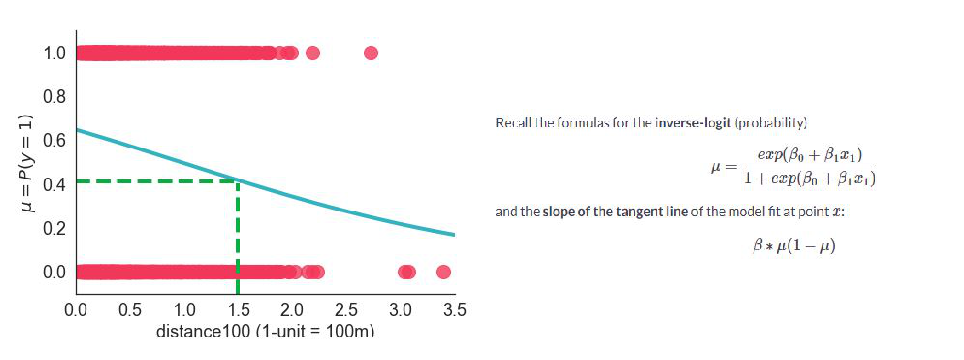

In [27]:
# Rate of change in probability

wells_GLM = model_GLM

# For the wells dataset you have already fitted a logistic regression model with the model formula switch ~ distance100
# obtaining the following fit:          

# log(μ / (1−μ)) = 0.606 - 0.6219×distance100

# In this exercise you will use that model to understand how the estimated probability changes at a certain value of 
# distance100, say 1.5.

plot_2('ex_8', 'ex_8_2', bottom=-0.5)

In [28]:
# Define x at 1.5
x = 1.5

# Extract intercept & slope from the fitted model
intercept, slope = wells_GLM.params

# Compute and print the estimated probability
est_prob = np.exp(intercept + slope*x)/(1+np.exp(intercept + slope*x))
print('Estimated probability at x = 1.5: ', round(est_prob, 4))

# Compute the slope of the tangent line for parameter beta at x
slope_tan = slope * est_prob * (1 - est_prob)
print('The rate of change in probability: ', round(slope_tan,4))

print("""\nSo at the distance100 value of {} the estimated probability is {} with the rate of change in the estimated
probability of negative {}. \n
This means that for every 1oo m increase in distance100 at the distance100 value of {} the probability of well switch 
decreases by {}%.""".format(
x, est_prob, -slope_tan, x, round(-slope_tan*100, 2)))

Estimated probability at x = 1.5:  0.4176
The rate of change in probability:  -0.153

So at the distance100 value of 1.5 the estimated probability is 0.4175572123418449 with the rate of change in the estimated
probability of negative 0.1529944669545088. 

This means that for every 1oo m increase in distance100 at the distance100 value of 1.5 the probability of well switch 
decreases by 15.3%.


#### Exercício 9 - Interpreting model inference

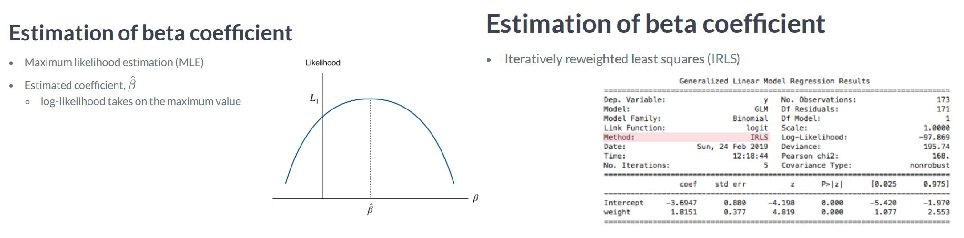

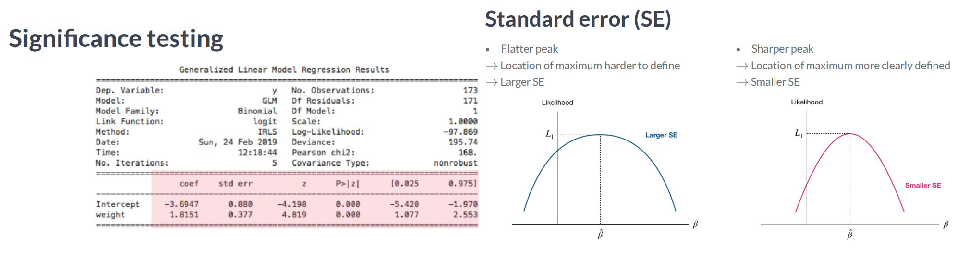

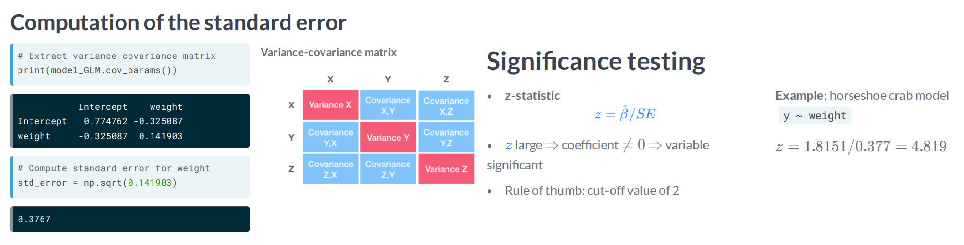

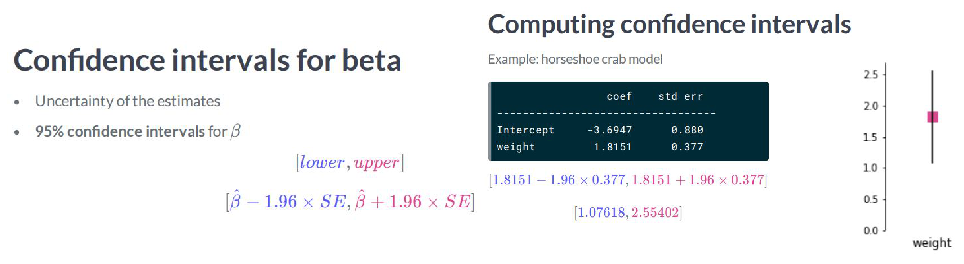

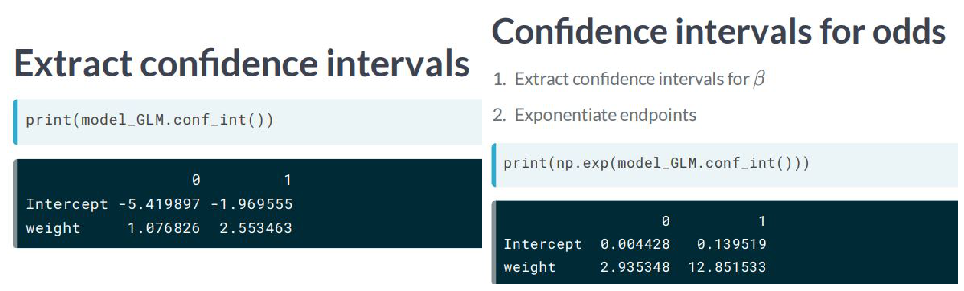

In [29]:
#vídeo

plot_2('beta_estimation', 'beta_estimation_irls')
plot_2('significance_testing' ,'se')
plot_2('variance_covariance_matrix' ,'z_statistic')
plot_2('confidence_intervals_beta', 'computing_ci')
plot_2('extract_ci', 'ci_odds')

Exercício 10

In [30]:
# Statistical significance

# Import libraries and th glm function
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit logistic regression and save as crab_GLM
crab_GLM = glm('y ~ width', data = crab, family = sm.families.Binomial()).fit()

# Print model summary
print(crab_GLM.summary())

############################################

# Question
# What is the relationship between width of the female crab and the probability of satellite in the nest?
print("""\nThere is a positive significant relationship (width increases the chance of a satellite).""")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.226
Date:                Thu, 23 Jan 2020   Deviance:                       194.45
Time:                        18:01:36   Pearson chi2:                     165.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.3508      2.629     -4.698      0.0

Exercício 11

In [31]:
# Computing Wald statistic

# Extract coefficients
intercept, slope = crab_GLM.params

# Estimated covariance matrix: crab_cov
crab_cov = crab_GLM.cov_params()
print(crab_cov)

# Compute standard error (SE): std_error
std_error = np.sqrt(crab_cov.loc['width', 'width'])
print('\nSE: ', round(std_error, 4))

# Compute Wald statistic
wald_stat = slope/std_error  #(estimated_beta / SE)
print('Wald statistic: ', round(wald_stat,4))

print("""With the Wald statistic at 4.887 we can conclude that the width variable is statistically significant if we apply
the rule of thumb cut-off value of 2.""")

           Intercept     width
Intercept   6.910158 -0.266848
width      -0.266848  0.010350

SE:  0.1017
Wald statistic:  4.8875
With the Wald statistic at 4.887 we can conclude that the width variable is statistically significant if we apply
the rule of thumb cut-off value of 2.


Exercício 12

In [32]:
# Confidence intervals

# Extract and print confidence intervals
print(crab_GLM.conf_int())

##########

# Compute confidence intervals for the odds
print(np.exp(crab_GLM.conf_int()))

print("""\nWe can conclude that a 1 cm increase in width of a female crab has at least 35% increase odds (from lower bound)
and at most it doubles the odds (from upper bound) that a satellite crab is present.""")

                   0         1
Intercept -17.503010 -7.198625
width       0.297833  0.696629
                      0         1
Intercept  2.503452e-08  0.000748
width      1.346936e+00  2.006975

We can conclude that a 1 cm increase in width of a female crab has at least 35% increase odds (from lower bound)
and at most it doubles the odds (from upper bound) that a satellite crab is present.


#### Exercício 13 - Computing and describing predictions

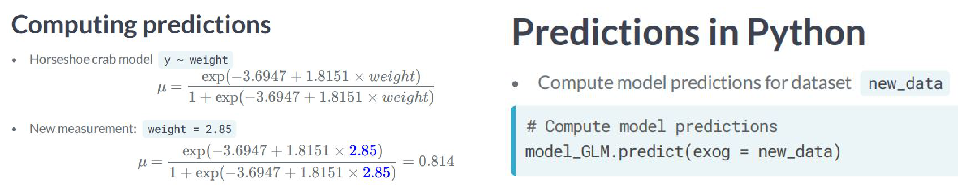

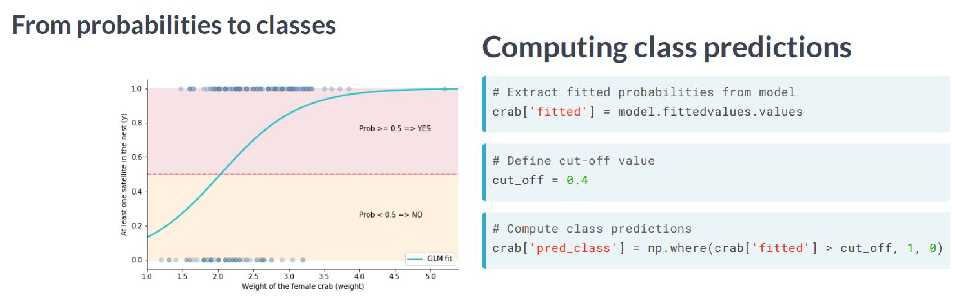

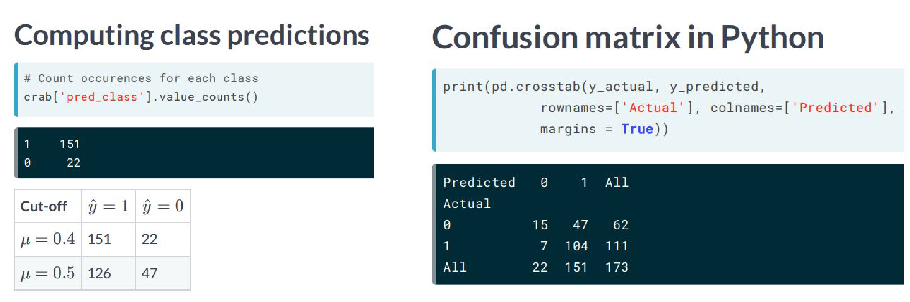

based in this confusion matrix, should we adjust the cut-off value?


In [33]:
#vídeo

plot_2('computing_new', 'new_data', wspace=0.1)
plot_2('prob_threshold', 'define_cut_off')
plot_2('class_predictions', 'confusion_matrix')
print("based in this confusion matrix, should we adjust the cut-off value?")

Exercício 14

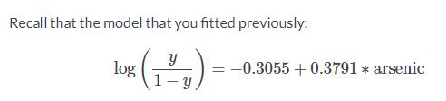

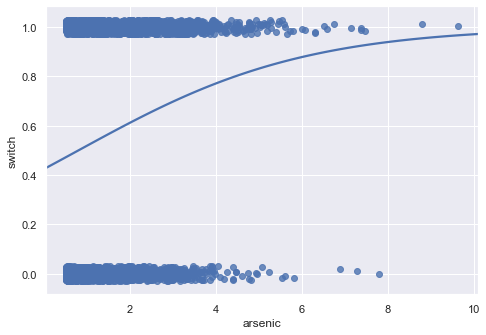

In [34]:
# Visualize model fit using regplot()

plot_1('ex_14')
########################

# Plot distance and switch and add overlay with the logistic fit
# Apply y_jitter of 0.03 to spread the values of the response for easier visualization.
sns.regplot(x = 'arsenic', y = 'switch', y_jitter = 0.03, data = wells, logistic = True, ci = None)

# Display the plot
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 15

In [35]:
# Define the formula the the logistic model
model_formula = 'switch ~ arsenic'

from sklearn.model_selection import train_test_split
y = wells['switch']
X = wells['arsenic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Define the correct probability distribution and the link function of the response variable
link_function = sm.families.links.logit   # this is the default link of the Binomial by the way
model_family = sm.families.Binomial(link=link_function)

# Fit the model
wells_fit = glm(formula = model_formula, 
                data = wells[['switch', 'arsenic']].loc[X_train.index, :],   # from the training data
                family = model_family).fit()

wells_test = pd.concat([X_test, y_test], axis=1)  # wells[['switch', 'arsenic']].loc[X_test.index, :]
wells.head()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  # This is added back by InteractiveShellApp.init_path()


switch  arsenic   distance  assoc  education  distance100  education4
0       1     2.36  16.826000      0          0      0.16826           0
1       1     0.71  47.321999      0          0      0.47322           0
2       0     2.07  20.966999      0         10      0.20967           2
3       1     1.15  21.486000      0         12      0.21486           2
4       1     1.10  40.874001      1         14      0.40874           3

In [36]:
# Compute predictions

# Compute predictions for the test sample wells_test and save as prediction
prediction = wells_fit.predict(exog = wells_test)

# Add prediction to the existing data frame wells_test and assign column name prediction
wells_test['prediction'] = prediction

# Examine the first 5 computed predictions
wells_test.head()


arsenic  switch  prediction
1949     1.12       1    0.530504
606      0.67       1    0.488734
123      0.83       1    0.503598
1909     0.83       1    0.503598
728      0.91       0    0.511029

Exercício 16

In [37]:
# Compute confusion matrix

# Define the cutoff
cutoff = 0.5

# Compute class predictions: y_prediction
y_prediction = np.where(prediction > cutoff, 1, 0)

# Assign actual class labels from the test sample to y_actual
y_actual = wells_test['switch']

# Compute and print confusion matrix using crosstab function
conf_mat = pd.crosstab(y_actual, y_prediction, 
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)
                      
# Print the confusion matrix
print(conf_mat)              

# Question
# Using the computed confusion matrix what are the values of TP (True Positives), TN (True Negatives), FP (False Positives),
# FN (False Negatives)
print("\nTP 424, TN 116, FP 267, FN 96")

Predicted    0    1  All
Actual                  
0          116  267  383
1           96  424  520
All        212  691  903

TP 424, TN 116, FP 267, FN 96


# CHAPTER 3 - Modeling Count Data

Here you'll learn about Poisson regression, including the discussion on count data, Poisson distribution and the interpretation of the model fit. You'll also learn how to overcome problems with overdispersion. Finally, you'll get hands-on experience with the process of model visualization.

#### Exercício 1 - Count data and Poisson distribution

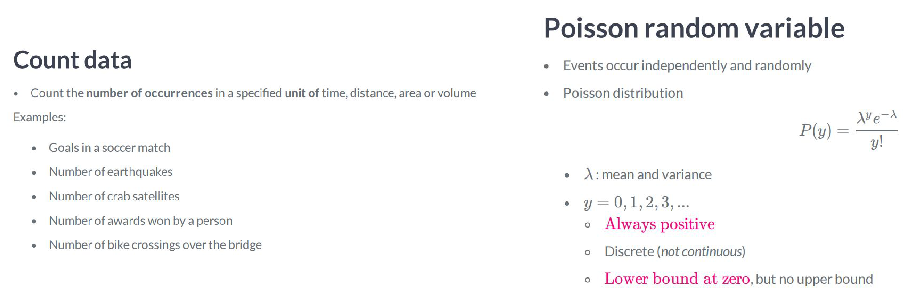

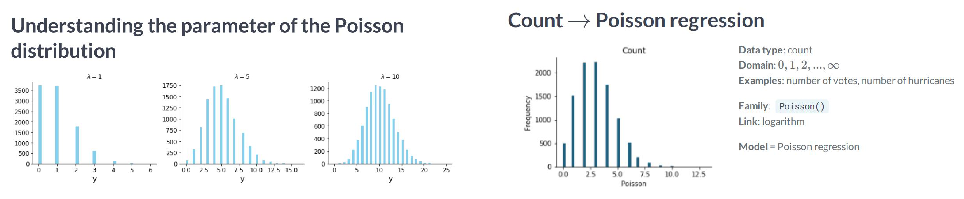

Explanatory variables:
 - Continuous and/or categorical → Poisson regression model
 - Categorical → log-linear model


In [38]:
#vídeo

plot_2('count_data', 'poisson_random_variable')
plot_2('lambda', 'poisson_regression', wspace=0.1)

print("""Explanatory variables:
 - Continuous and/or categorical → Poisson regression model
 - Categorical → log-linear model""")

# GLM with Poisson in Python
import statsmodels.api as sm
from statsmodels.formula.api import glm

glm('Total_Crossings ~ Avg_Temp', data = bike, family = sm.families.Poisson())


Exercício 2

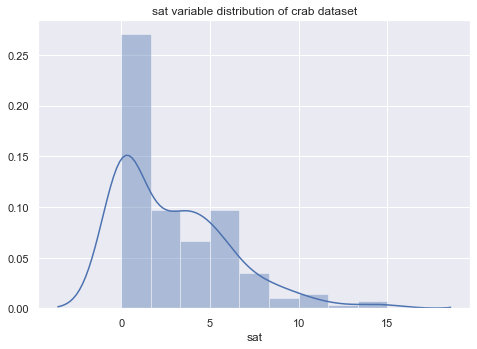

crab  sat  y  weight  width  color  spine         width_C
0     1    8  1    3.05   28.3      2      3  [28.25, 29.25)
1     2    0  0    1.55   22.5      3      3    [0.0, 23.25)
2     3    9  1    2.30   26.0      1      1  [25.25, 26.25)
3     4    0  0    2.10   24.8      3      3  [24.25, 25.25)
4     5    4  1    2.60   26.0      3      3  [25.25, 26.25)

In [39]:
# Visualize the response

# Plot sat variable
sns.distplot(crab['sat'])

plt.title('sat variable distribution of crab dataset')

# Display the plot
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()
crab.head()

Exercício 3

In [40]:
# Fitting a Poisson regression

# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit Poisson regression of sat by weight
model = glm('sat ~ weight', data = crab, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.08
Date:                Thu, 23 Jan 2020   Deviance:                       560.87
Time:                        18:01:42   Pearson chi2:                     536.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4284      0.179     -2.394      0.0

#### Exercício 4 - Interpreting model fit

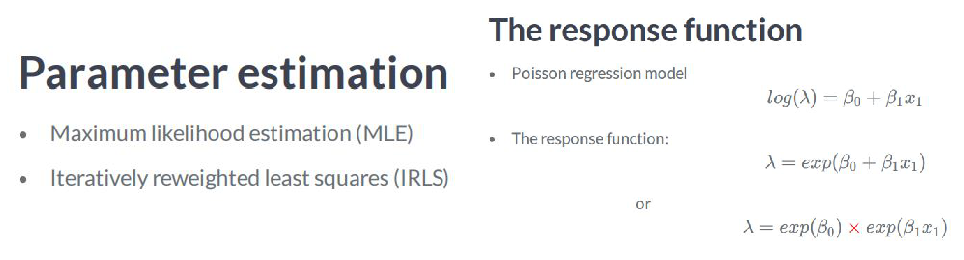

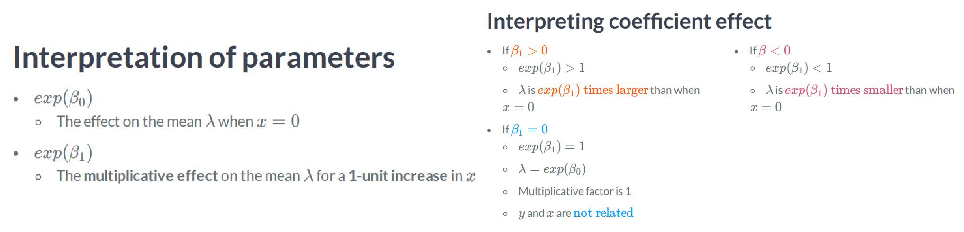

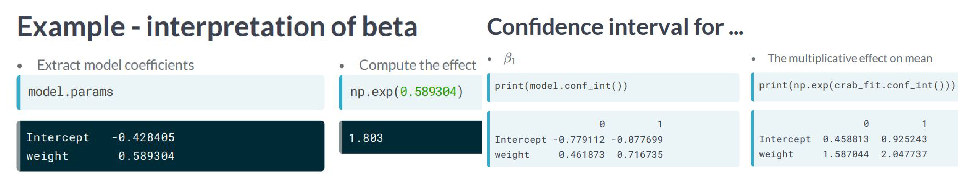

In [41]:
#vídeo

plot_2('parameter_estimation', 'response_function')
plot_2('poisson_parameters', 'coefficient_effect')
plot_2('example_poisson', 'confidence_interval_for')


Exercício 5

In [42]:
# Estimate parameter lambda

# Fit Poisson regression of sat by width
model = glm('sat ~ width', data = crab, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

########

# Compute average crab width
mean_width = np.mean(crab['width'])

# Print the compute mean
print('\nAverage width: ', round(mean_width, 3))

# Extract coefficients
intercept, slope = model.params

# Compute the estimated mean of y (lambda) at the average width
est_lambda = np.exp(intercept) * np.exp(slope * mean_width)

# Print estimated mean of y
print('Estimated mean of y at average width: ', round(est_lambda, 3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.59
Date:                Thu, 23 Jan 2020   Deviance:                       567.88
Time:                        18:01:43   Pearson chi2:                     544.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3048      0.542     -6.095      0.0

Exercício 6

In [43]:
# Interpret Poisson coefficients

# Question
# Using the model fitted in the previous exercise which is the correct interpretation of the coefficient for width variable?

print("""The estimate β1 is positive meaning that the effect on the mean of the response will be exp(β1) times larger than
if x=0. \n""")

# Extract coefficients
intercept, slope = model.params

# Compute and print the multiplicative effect
print(np.exp(slope))


The estimate β1 is positive meaning that the effect on the mean of the response will be exp(β1) times larger than
if x=0. 

1.17826743864523


Exercício 7

In [44]:
# Poisson confidence intervals

# Compute confidence intervals for the coefficients
model_ci = model.conf_int()

# Compute and print the confidence intervals for the multiplicative effect on the mean
print(np.exp(model.conf_int()))
print("""The multiplicative effect on the mean response for a 1-unit increase in width is at least 1.13 and at most 1.22""")

                  0         1
Intercept  0.012683  0.106248
width      1.133051  1.225289
The multiplicative effect on the mean response for a 1-unit increase in width is at least 1.13 and at most 1.22


#### Exercício 8 - The Problem of Overdispersion

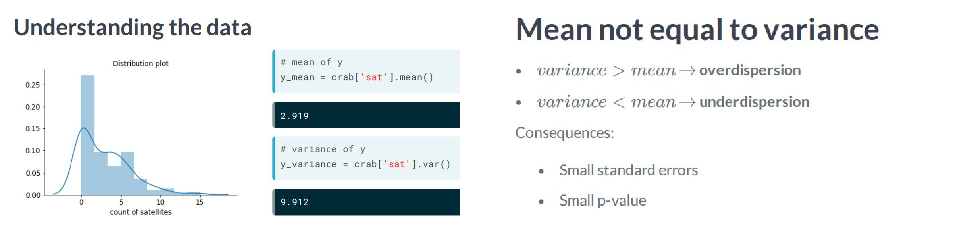

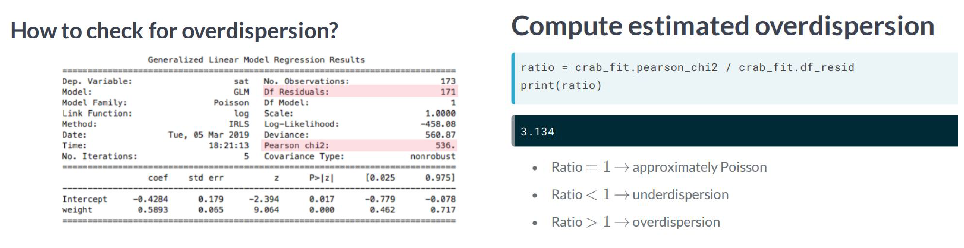

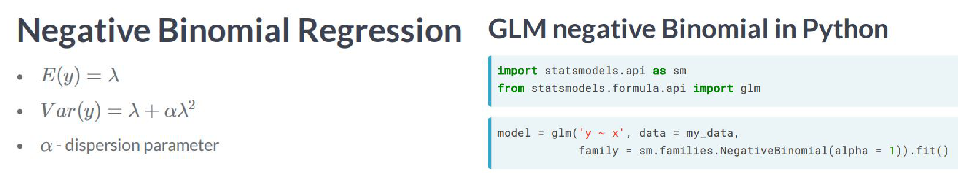

In [45]:
#vídeo

plot_2('understanding_poisson', 'mean_variance', wspace=0.1)
plot_2('overdispersion', 'compute_overdispersion', wspace=0.1)
plot_2('negative_binomial_regression', 'glm_negative_bin')


Exercício 9

In [46]:
# Is the mean equal to the variance?

# Compute and print sample mean of the number of satellites: sat_mean
sat_mean = np.mean(crab.sat)

print('Sample mean:', round(sat_mean, 3))

# Compute and print sample variance of the number of satellites: sat_var
sat_var = np.var(crab.sat)
print('Sample variance:', round(sat_var, 3))

# Compute ratio of variance to mean
print('Ratio:', round(sat_var/sat_mean, 3))

print("""\nNotice that the variance is 3.37 times the mean. This gives an indication that Poisson GLM will not provide the
most accurate fit to the data. Let's do another check before moving on.""")

Sample mean: 2.919
Sample variance: 9.855
Ratio: 3.376

Notice that the variance is 3.37 times the mean. This gives an indication that Poisson GLM will not provide the
most accurate fit to the data. Let's do another check before moving on.


Exercício 10

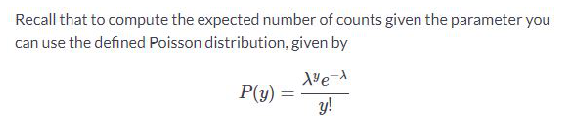

Expected zero counts given mean of  2.919 is  5.4
Actual zero counts in the sample:  35.8


In [47]:
# Computing expected number of counts

plot_1('recall_ex10', right=1.3)

################################################################################################

import math

# Expected number of zero counts
exp_zero_cnt = ((sat_mean**0)*np.exp(-sat_mean))/math.factorial(0)

# Print exp_zero_counts
print('Expected zero counts given mean of ', round(sat_mean,3), 
      'is ', round(exp_zero_cnt,3)*100)

# Number of zero counts in sat variable
actual_zero_ant = sum(crab['sat']  == 0)

# Number of observations in crab dataset
num_obs = len(crab)

# Print the percentage of zero count observations in the sample
print('Actual zero counts in the sample: ', round(actual_zero_ant / num_obs,3)*100)


Exercício 11

In [48]:
# Checking for overdispersion

crab_pois = glm('sat ~ width', data = crab, family = sm.families.Poisson()).fit()

# Compute and print the overdispersion approximation
print(crab_pois.pearson_chi2 / crab_pois.df_resid)

print("""\nThere is overdispersion present since the ratio is greater than 1, meaning that the coefficient estimates should
not be interpreted directly.""")

3.182204743877359

There is overdispersion present since the ratio is greater than 1, meaning that the coefficient estimates should
not be interpreted directly.


Exercício 12

In [49]:
# Fitting negative binomial

# Define the formula for the model fit
formula = 'sat ~ width'

# Fit the GLM negative binomial model using log link function
crab_NB = glm(formula = formula, data = crab, family = sm.families.NegativeBinomial()).fit()

# Print Poisson model's summary
print("Poisson model's summary:")
print(crab_pois.summary(), "\n\n")

# Print the negative binomial model's summary
print("Negative binomial model's summary:")
print(crab_NB.summary())

print("""\nNotice how standard error increased to 0.042, reflecting overdispersion which was not captured with the Poisson 
model.""")

Poisson model's summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -461.59
Date:                Thu, 23 Jan 2020   Deviance:                       567.88
Time:                        18:01:46   Pearson chi2:                     544.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3048      

Exercício 13

In [50]:
# Confidence intervals for negative Binomial model

# Compute confidence intervals for crab_Pois model
print('Confidence intervals for the Poisson model:')
print(crab_pois.conf_int())

# Compute confidence intervals for crab_NB model
print('\nConfidence intervals for the Negative Binomial model:')
print(crab_NB.conf_int())

print("""\nNotice how the confidence intervals are wider for the negative Binomial model compared to quite narrow 
confidence intervals for the Poisson model since it did not account for overdispersion.""")

Confidence intervals for the Poisson model:
                  0         1
Intercept -4.367531 -2.241983
width      0.124914  0.203176

Confidence intervals for the Negative Binomial model:
                  0         1
Intercept -6.244509 -1.820000
width      0.108155  0.274472

Notice how the confidence intervals are wider for the negative Binomial model compared to quite narrow 
confidence intervals for the Poisson model since it did not account for overdispersion.


#### Exercício 14 - Plotting a regression model

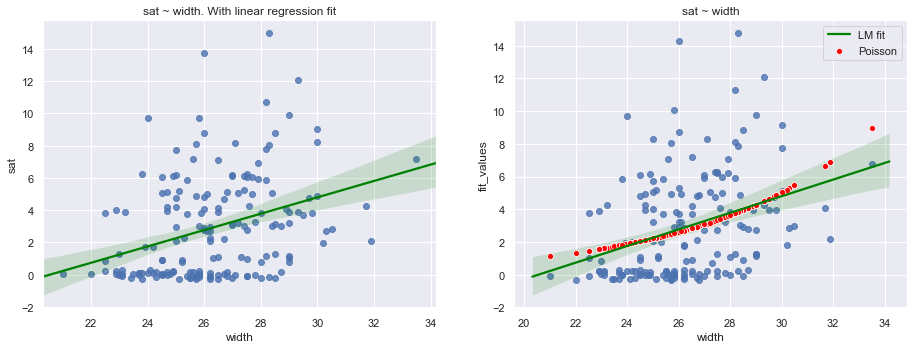

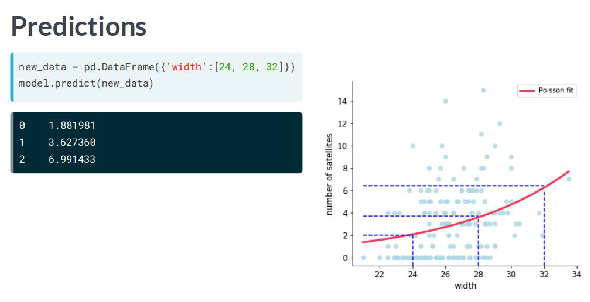

In [51]:
#vídeo

# Plot data points
plt.subplot(1, 2, 1)
sns.regplot('width', 'sat', data = crab, fit_reg = True, y_jitter = 0.3, line_kws = {'color':'green', 'label':'LM fit'})
plt.title('sat ~ width. With linear regression fit')

# Add Poisson GLM estimated values
crab['fit_values'] = model.fittedvalues

plt.subplot(1, 2, 2)
sns.regplot('width', 'sat', data = crab, y_jitter = 0.3, line_kws = {'color':'green', 'label':'LM fit'})
sns.scatterplot('width', 'fit_values', data = crab, color = 'red', label = 'Poisson')
plt.title('sat ~ width')

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

plot_1('poisson_predictions', right=1.4)

Exercício 15

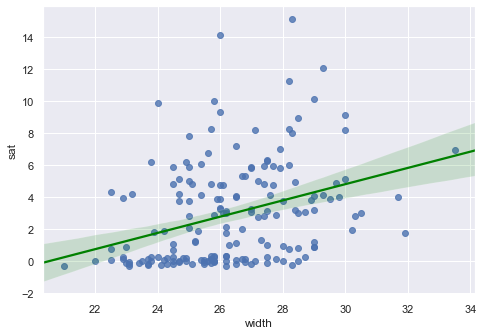

In [52]:
# Plotting data and linear model fit

# Plot the data points and linear model fit
sns.regplot('width', 'sat', data = crab, y_jitter = 0.3, fit_reg = True, line_kws = {'color':'green', 'label':'LM fit'})

# Print plot
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0)
plt.show()

Exercício 16

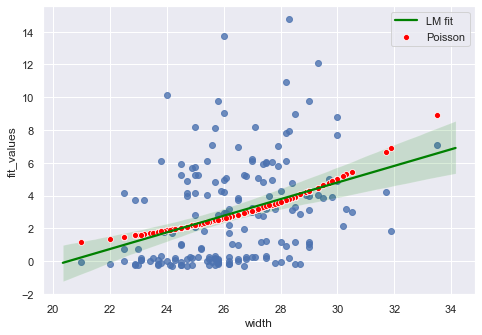

In [53]:
# Plotting fitted values

# Add fitted values to the fit_values column of crab dataframe
crab['fit_values'] = model.fittedvalues

# Plot data points
sns.regplot('width', 'sat', data = crab, y_jitter = 0.3, fit_reg = True, line_kws = {'color':'green', 'label':'LM fit'})

# Poisson regression fitted values
sns.scatterplot('width', 'fit_values', data = crab, color = 'red', label = 'Poisson')

# Print plot          
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0)
plt.show()


# CHAPTER 4 - Multivariable Logistic Regression

In this final chapter you'll learn how to increase the complexity of your model by adding more than one explanatory variable. You'll practice with the problem of multicollinearity, and with treating categorical and interaction terms in your model.

#### Exercício 1 - Multivariable logistic regression

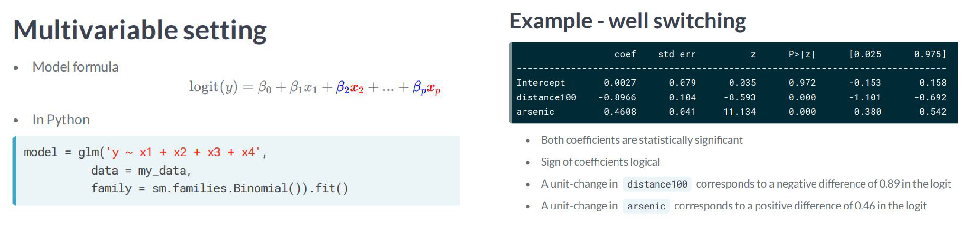

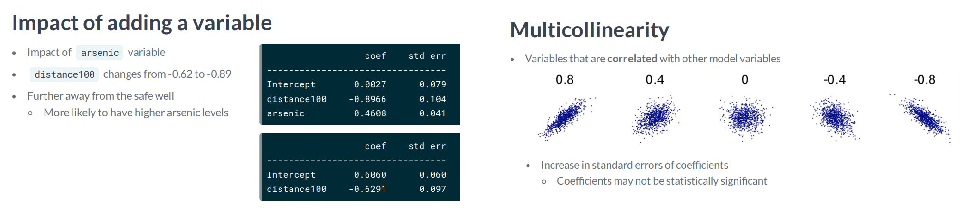

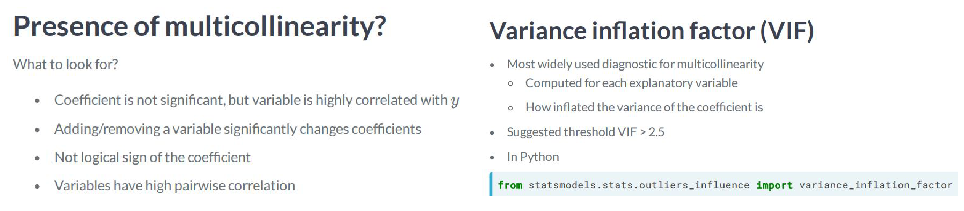

In [54]:
#vídeo

plot_2('multivariable', 'example_multi', wspace=0.1)
plot_2('adding_variable' ,'multicollinearity', wspace=0.1)
plot_2('multicollinearity_presence', 'vif')

from statsmodels.stats.outliers_influence import variance_inflation_factor


Exercício 2

In [55]:
# Fit a multivariable logistic regression

# Import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Define model formula
formula = 'y ~ width + color'

# Fit GLM
model = glm(formula, data = crab, family = sm.families.Binomial()).fit()

# Print model summary
print(model.summary())

print("""\nFrom model summary note that for each one-level increase in color of the female crab, the estimated odds multiply
by exp(-0.509)=0.6, i.e. the odds for dark crabs are 60% than those for medium crabs.""")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      170
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -94.561
Date:                Thu, 23 Jan 2020   Deviance:                       189.12
Time:                        18:01:50   Pearson chi2:                     170.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0708      2.807     -3.588      0.0

Exercício 3

In [56]:
# The effect of multicollinearity

# Import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Define model formula
formula = 'y ~ weight + width'

# Fit GLM
model = glm(formula, data = crab, family = sm.families.Binomial()).fit()

# Print model summary
print(model.summary())

print("""\nNotice that the neither weight nor width are statistically significant. Recall that when we fitted univariate
logistic regressions for each variable, both variables where statistically significant. 
There is evident presence of multicollinearity! Let's measure it in the next exercise.""")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      170
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.446
Date:                Thu, 23 Jan 2020   Deviance:                       192.89
Time:                        18:01:50   Pearson chi2:                     167.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3547      3.528     -2.652      0.0

Exercício 4

In [57]:
# Compute VIF

# Import functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get variables for which to compute VIF and add intercept term
X = crab[['weight', 'width', 'color']]
X['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)

print("""\nWith VIF well above 2.5 for weight and width means that there is multicollinearity present in the model and you
can not use both variables in the model.""")

   variables         VIF
0     weight    4.691018
1      width    4.726378
2      color    1.076594
3  Intercept  414.163343

With VIF well above 2.5 for weight and width means that there is multicollinearity present in the model and you
can not use both variables in the model.


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Exercício 5 - Comparing models

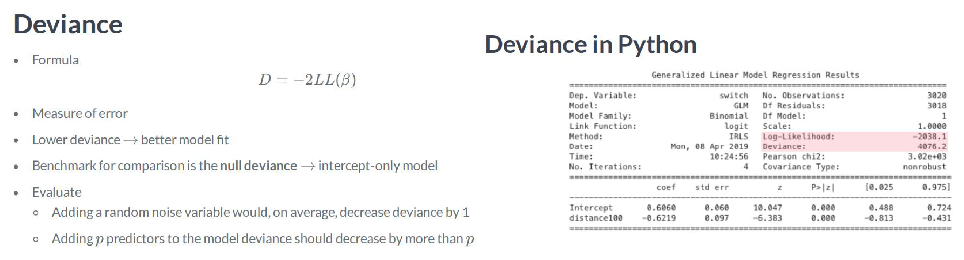

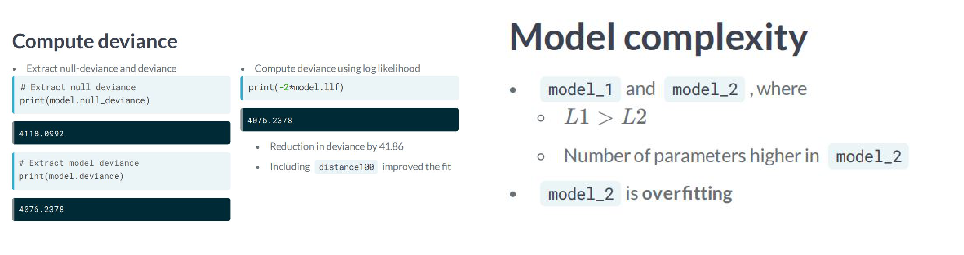

In [58]:
#vídeo

plot_2('deviance' ,'deviance_python')
plot_2('compute_deviance', 'model_complexity', wspace=0.1)


Exercício 6

In [59]:
# Checking model fit

# Import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Define model formula
formula = 'switch ~ distance100 + arsenic'

# Fit GLM
model_dist_ars = glm(formula, data = wells, family = sm.families.Binomial()).fit()

# Compare deviance of null and residual model
diff_deviance = model_dist_ars.null_deviance - model_dist_ars.deviance

# Print the computed difference in deviance
print(diff_deviance)

print("""\nHaving both distance100 and arsenic in the model reduces deviance by 187 compared to the intercept only model. 
But what is the actual impact of additional variable arsenic? Let's see in the next exericise.""")

188.76305963384902

Having both distance100 and arsenic in the model reduces deviance by 187 compared to the intercept only model. 
But what is the actual impact of additional variable arsenic? Let's see in the next exericise.


Exercício 7

In [60]:
# Compare two models

model_dist = glm('switch ~ distance100', data = wells, family = sm.families.Binomial()).fit()
model_dist_ars = glm('switch ~ distance100 + arsenic', data = wells, family = sm.families.Binomial()).fit()

##############

# Compute the difference in adding distance100 variable
diff_deviance_distance = model_dist.null_deviance - model_dist.deviance

# Print the computed difference in deviance
print('Adding distance100 to the null model reduces deviance by: ', 
      round(diff_deviance_distance,3))

# Compute the difference in adding arsenic variable
diff_deviance_arsenic = model_dist.deviance - model_dist_ars.deviance

# Print the computed difference in deviance
print('Adding arsenic to the distance model reduced deviance even further by: ', 
      round(diff_deviance_arsenic,3))


Adding distance100 to the null model reduces deviance by:  42.726
Adding arsenic to the distance model reduced deviance even further by:  146.037


Exercício 8

In [61]:
# Deviance and linear transformation

# Import functions
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit logistic regression model as save as model_dist_1
model_dist_1 = glm('switch ~ distance', data = wells, family = sm.families.Binomial()).fit()
model_dist = glm('switch ~ distance100', data = wells, family = sm.families.Binomial()).fit()

# Check the difference in deviance of model_dist_1 and model_dist
print('Difference in deviance is: ', round(model_dist_1.deviance - model_dist.deviance,3))

print("""\nNote that linear transformations do not change the model error and hence the deviance remains the same. The 
reason being since linear transformation does not add new data information to the model.""")

Difference in deviance is:  0.0

Note that linear transformations do not change the model error and hence the deviance remains the same. The 
reason being since linear transformation does not add new data information to the model.


#### Exercício 9 - Model formula

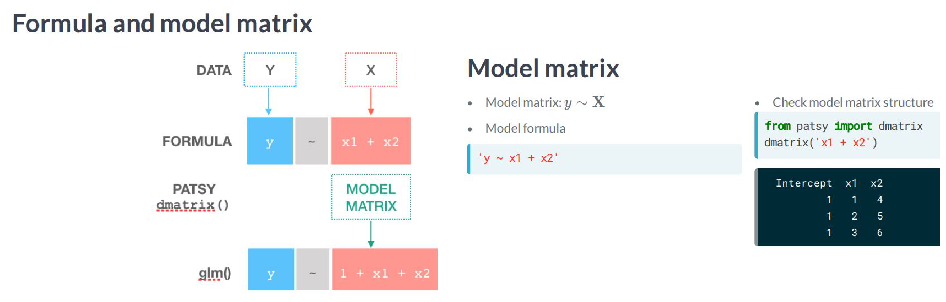

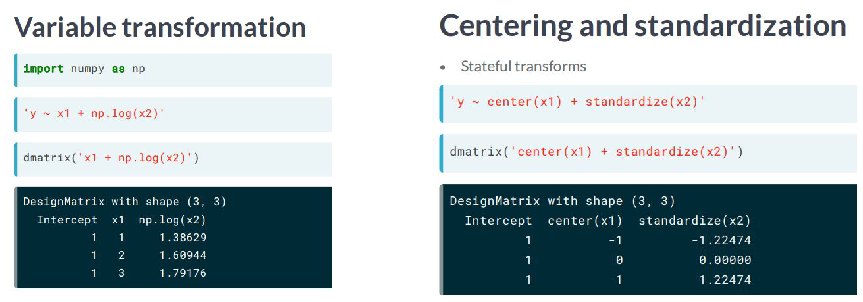

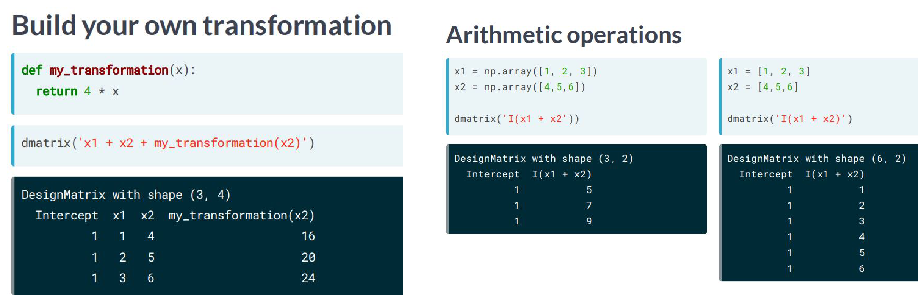

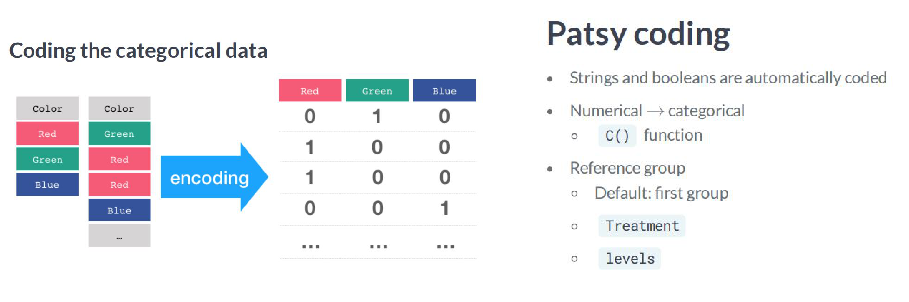

In [62]:
#vídeo

plot_2('formula_model_matrix', 'model_matrix')
plot_2('variable_transformation', 'centering')
plot_2('build_transformation', 'arithmetic')
plot_2('coding_categorical', 'patsy')

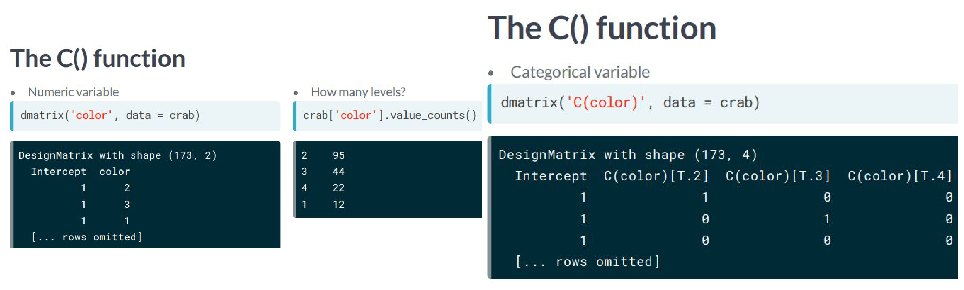

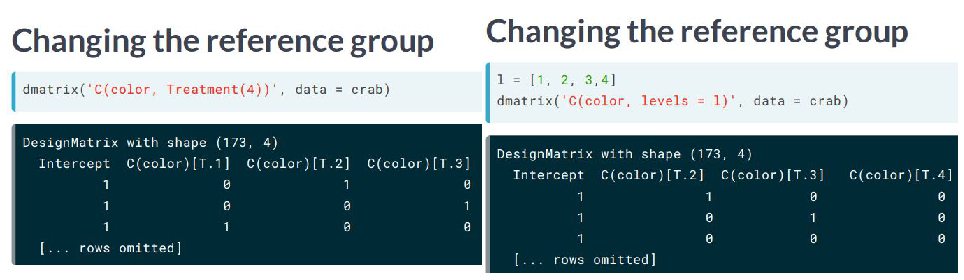

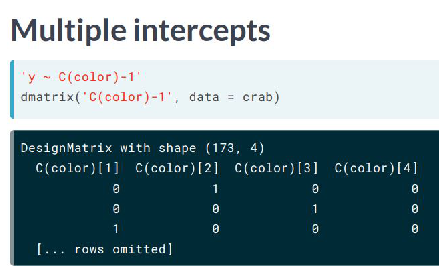

In [63]:
plot_2('c_1', 'c_2'); plot_2('c_3', 'c_4'); plot_1('multiple_intercepts')

Exercício 10

In [64]:
# Model matrix for continuous variables

# Import function dmatrix()
from patsy import dmatrix

# Construct model matrix with arsenic
model_matrix = dmatrix('arsenic', data = wells, return_type = 'dataframe')
print(model_matrix.head(), "\n")

# Construct model matrix with arsenic and distance100
model_matrix = dmatrix('arsenic + distance100', data = wells, return_type = 'dataframe')
print(model_matrix.head())

print("""\nNotice how dmatrix() silently includes an intercept for each model matrix without you specifying it. Analyzing 
the output from dmatrix()you can be sure that the inputs are correctly structured.""")

   Intercept  arsenic
0        1.0     2.36
1        1.0     0.71
2        1.0     2.07
3        1.0     1.15
4        1.0     1.10 

   Intercept  arsenic  distance100
0        1.0     2.36      0.16826
1        1.0     0.71      0.47322
2        1.0     2.07      0.20967
3        1.0     1.15      0.21486
4        1.0     1.10      0.40874

Notice how dmatrix() silently includes an intercept for each model matrix without you specifying it. Analyzing 
the output from dmatrix()you can be sure that the inputs are correctly structured.


Exercício 11

In [65]:
# Variable transformation

# Import function dmatrix
from patsy import dmatrix

# Construct model matrix for arsenic with log transformation
print(dmatrix('np.log(arsenic)', data = wells, return_type = 'dataframe').head(), "\n")

#####################################################################

# Import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Define model formula
formula = 'switch ~ np.log(arsenic)'

# Fit GLM
model_log_ars = glm(formula, data = wells, family = sm.families.Binomial()).fit()

# Print model summary
print(model_log_ars.summary(), "\n")

#####################################################################

model_ars = glm('switch ~ arsenic', data = wells, family = sm.families.Binomial()).fit()

print("""Question:
- Does the model with log transformed arsenic variable improve the model fit compared to a model with non-transformed 
variable arsenic, and if so what is the change in model error?\n""")

print("""Yes, the model with log(arsenic) improves model fit with a reduction in deviance of {}.""".format(
round(model_ars.deviance - model_log_ars.deviance, 2)))


   Intercept  np.log(arsenic)
0        1.0         0.858662
1        1.0        -0.342490
2        1.0         0.727549
3        1.0         0.139762
4        1.0         0.095310 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3008
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.6
Date:                Thu, 23 Jan 2020   Deviance:                       3975.3
Time:                        18:01:55   Pearson chi2:                 3.01e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef  

Exercício 12

In [66]:
# Coding categorical variables

# Import function dmatrix
from patsy import dmatrix

# Construct and print model matrix for color as categorical variable
print(dmatrix('C(color)', data = crab, return_type = 'dataframe').head(), "\n")

# Construct and print the model matrix for color with reference group 3
print("""Notice the change in columns (abaixo) where now the medium dark category is the reference group, where its mean 
behavior is represented by the intercept. We will see the details on this topics in the following video.""")
dmatrix('C(color, Treatment(3))', data = crab, return_type = 'dataframe').head()


   Intercept  C(color)[T.2]  C(color)[T.3]  C(color)[T.4]
0        1.0            1.0            0.0            0.0
1        1.0            0.0            1.0            0.0
2        1.0            0.0            0.0            0.0
3        1.0            0.0            1.0            0.0
4        1.0            0.0            1.0            0.0 

Notice the change in columns (abaixo) where now the medium dark category is the reference group, where its mean 
behavior is represented by the intercept. We will see the details on this topics in the following video.


Intercept  C(color, Treatment(3))[T.1]  C(color, Treatment(3))[T.2]  \
0        1.0                          0.0                          1.0   
1        1.0                          0.0                          0.0   
2        1.0                          1.0                          0.0   
3        1.0                          0.0                          0.0   
4        1.0                          0.0                          0.0   

   C(color, Treatment(3))[T.4]  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0

#### Exercício 13 - Categorical and interaction terms

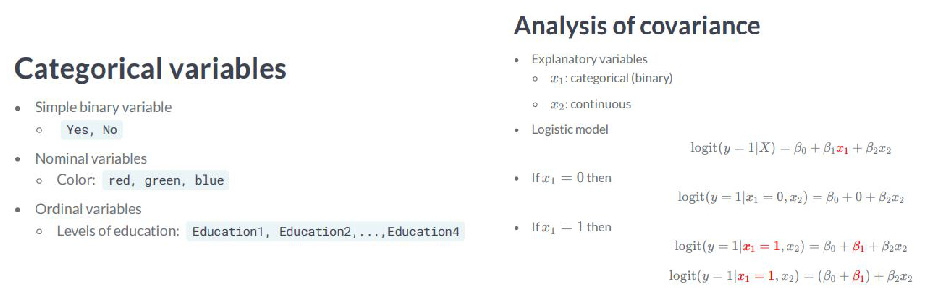

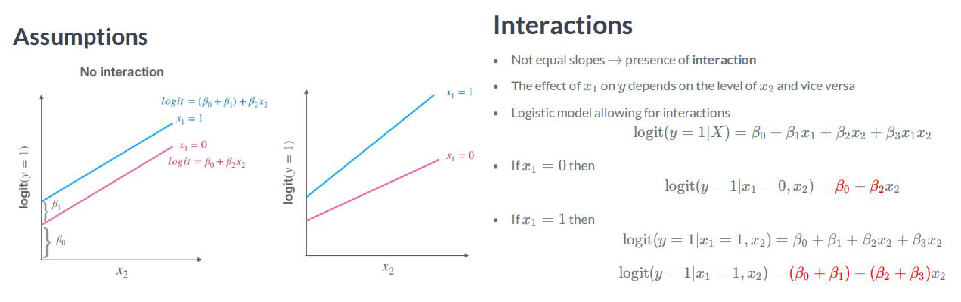

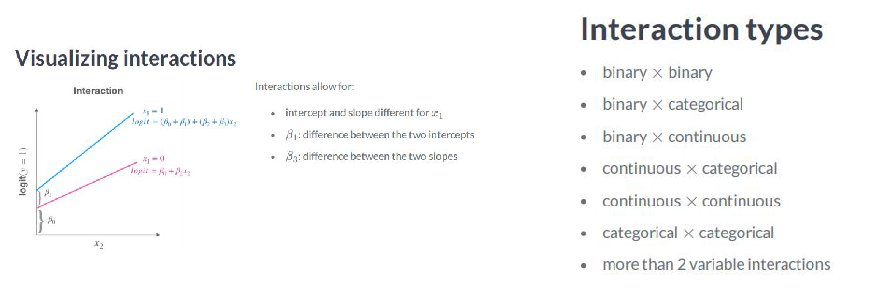

In [67]:
#vídeo

plot_2('categorical', 'covariance_analysis')
plot_2('assumptions_cat', 'interactions')
plot_2('visualizing_interactions', 'interaction_types')


Exercício 14

In [68]:
# Modeling with categorical variable

# Construct model matrix
model_matrix = dmatrix('C(color, Treatment(4))' , data = crab, return_type = 'dataframe')

# Fit and print the results of a glm model with the above model matrix configuration
model = glm('y ~ C(color, Treatment(4))', data = crab, family = sm.families.Binomial()).fit()

print(model.summary())

# Print first 5 rows of model matrix dataframe
model_matrix.head()

##################################################

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      169
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.03
Date:                Thu, 23 Jan 2020   Deviance:                       212.06
Time:                        18:01:57   Pearson chi2:                     173.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Intercept  C(color, Treatment(4))[T.1]  C(color, Treatment(4))[T.2]  \
0        1.0                          0.0                          1.0   
1        1.0                          0.0                          0.0   
2        1.0                          1.0                          0.0   
3        1.0                          0.0                          0.0   
4        1.0                          0.0                          0.0   

   C(color, Treatment(4))[T.3]  
0                          0.0  
1                          1.0  
2                          0.0  
3                          1.0  
4                          1.0

In [69]:
# Question
#Using the previously fitted model

# logit = −0.7621 + 1.8608×color1 + 1.7382×color2 + 1.1299×color3

# Which of the following is the correct interpretation of the coefficient of the color_2 variable in terms of odds?
print("""The estimated odds that a crab with color_2 (medium) has a satellite nearby are {} times the estimated odds 
that a crab with color_4 (dark) has a satellite present.""".format(round(np.exp(1.7382), 3)))

The estimated odds that a crab with color_2 (medium) has a satellite nearby are 5.687 times the estimated odds 
that a crab with color_4 (dark) has a satellite present.


In [70]:
# Construct model matrix
model_matrix = dmatrix('C(color, Treatment(4)) + width' , data = crab, return_type = 'dataframe')

# Fit and print the results of a glm model with the above model matrix configuration
model = glm('y ~ C(color, Treatment(4)) + width', data = crab, family = sm.families.Binomial()).fit()

print(model.summary())

# Print first 5 rows of model matrix
model_matrix.head()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      168
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -93.729
Date:                Thu, 23 Jan 2020   Deviance:                       187.46
Time:                        18:01:57   Pearson chi2:                     169.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Intercept  C(color, Treatment(4))[T.1]  C(color, Treatment(4))[T.2]  \
0        1.0                          0.0                          1.0   
1        1.0                          0.0                          0.0   
2        1.0                          1.0                          0.0   
3        1.0                          0.0                          0.0   
4        1.0                          0.0                          0.0   

   C(color, Treatment(4))[T.3]  width  
0                          0.0   28.3  
1                          1.0   22.5  
2                          0.0   26.0  
3                          1.0   24.8  
4                          1.0   26.0

In [71]:
# Question
# Using the fitted model

# logit = −12.7151 + 1.3299×color1 + 1.4023×color2 + 1.1061×color3 + 0.4680×width

# Which of the following would be the correct interpretation of the estimated coefficient for width in terms of odds?
print("""A one-unit increase in width has multiplicative effect of {} on the odds that the satellite is nearby for all
color groups.""".format(round(np.exp(0.4680), 4)))

A one-unit increase in width has multiplicative effect of 1.5968 on the odds that the satellite is nearby for all
color groups.


Exercício 15

In [72]:
# Interaction terms

# Import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Fit GLM and print model summary
model_int = glm('switch ~ center(distance100) + center(arsenic) + center(distance100):center(arsenic)', 
                data = wells, family = sm.families.Binomial()).fit()

# View model results
print(model_int.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 switch   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3006
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1956.2
Date:                Thu, 23 Jan 2020   Deviance:                       3912.4
Time:                        18:01:57   Pearson chi2:                 3.08e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [73]:
# Question

# To interpret the interaction parameter we need to consider the effect of its coefficient on both arsenic and distance100
# estimates. Hence, for a one-unit change in the explanatory variable the interaction coefficient is added to each 
# coefficient for individual variable.

# Considering the model summary of the previously fitted model, which of the following is the correct interpretation of the 
# model with interaction term?

print("""1) The interaction term increases the importance of distance100 as explanatory variable given one unit increase in 
arsenic levels.

2) The interaction term decreases the importance of arsenic as explanatory variable given one unit increase in distance100
values.

3) At average value of distance100 and arsenic the probability of switching from the current well is equal to 0.59.""")


1) The interaction term increases the importance of distance100 as explanatory variable given one unit increase in 
arsenic levels.

2) The interaction term decreases the importance of arsenic as explanatory variable given one unit increase in distance100
values.

3) At average value of distance100 and arsenic the probability of switching from the current well is equal to 0.59.


#### Exercício 16 - end

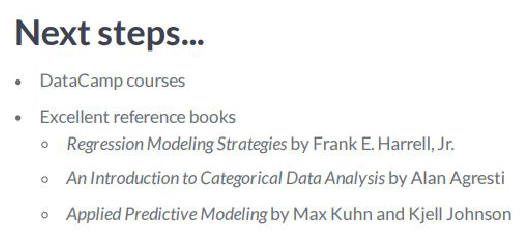

In [74]:
#vídeo

plot_1('books', right=1.2)

# Fim